In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns

In [54]:
def get_excel_columns(n_cols):
    col_list = []
    n = n_cols
    alpha_list = [chr(c) for c in range(ord('A'), ord('Z') + 1)]
    alpha_list.insert(0,'dummy')
    for i in range(1,n+1):
        col_i = ""
        index_list=[]
        p=[]
        while i>26:
            k = i%26
            i = i//26
            if k==0:
                index_list.append(26)
                i = i-1
            else:
                index_list.append(k)
        index_list.append(int(i))
        index_list.reverse()
        for i in index_list:
            p.append(alpha_list[i])
            col_i = "".join(p)
        col_list.append(col_i)
    return col_list

In [55]:
df = pd.read_csv("winconsin_breast_data.csv", header = None)
df.columns = get_excel_columns(len(df.columns))
df.head()

,A,B,C,D,E,F,G,H,I,J,...,V,W,X,Y,Z,AA,AB,AC,AD,AE
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,o


## Test - Train Split

In [56]:
X = df[get_excel_columns(len(df.columns)-1)].values
X[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [57]:
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 2.94459131, -1.89399111,  3.371523  ,  3.36963993,  1.81249678,
         5.04621217,  5.08769495,  6.05073727,  2.61040516,  2.19541343,
         6.38173199, -0.5300153 ,  7.46062666, 10.2208802 , -0.26269255,
         1.62634574,  0.83574339,  1.02830733,  1.29585726,  0.85369735,
         5.10341829, -1.13070628,  6.03326554,  6.66959237,  1.72441348,
         4.14201805,  3.44009576,  4.48857786,  3.78330533,  2.34529106],
       [ 4.26836286, -0.04130767,  4.14618628,  5.44299467, -0.59621146,
        -0.10861027,  0.75565908,  2.15545499,  0.23459583, -0.90539638,
         2.00085916, -0.82392687,  1.53572553,  4.03886939, -0.64979315,
        -0.52902448, -0.23994536,  0.59573852, -0.93584561, -0.05286392,
         4.93513036, -0.03143574,  4.41810873,  6.37804259, -0.10348328,
        -0.04354059,  0.42000932,  2.58638752,  0.03048366,  0.52029929],
       [ 3.81684388,  0.83113325,  3.92375821,  4.65830964,  1.18276914,
         1.99674192,  3.00092157,  5.07856231,  1

In [58]:
y = df.iloc[:,-1]
y[0:5]

0    o
1    o
2    o
3    o
4    o
Name: AE, dtype: object

In [59]:
len(X)

367

In [60]:
len(y)

367

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("Train Data: ", X_train.shape, y_train.shape)
print("Test Data: ", X_test.shape, y_test.shape)

Train Data:  (256, 30) (256,)
Test Data:  (111, 30) (111,)


In [62]:
y_test.value_counts()

n    108
o      3
Name: AE, dtype: int64

In [63]:
y_train.value_counts()

n    249
o      7
Name: AE, dtype: int64

In [64]:
lof = LocalOutlierFactor(n_neighbors = 10, contamination = 0.1)
lof.fit(X_train)

LocalOutlierFactor(contamination=0.1, n_neighbors=10)

In [65]:
y_hat = lof.fit_predict(X)
y_hat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [66]:
y_array = y.to_numpy().astype(str)
y_array

array(['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n

In [67]:
y_array = np.where(y_array == 'o', -1, 1)

In [68]:
y_array

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [69]:
n_errors = (y_hat != y_array).sum()
n_errors

27

In [70]:
error_rate_percent = n_errors/len(y_array)
error_rate_percent

0.07356948228882834

In [71]:
len(y_array)

367

In [94]:
error_rate = []
accuracy = []

for i in range(1,30):
    lof = LocalOutlierFactor(n_neighbors = i, contamination = 0.1)
    y_hat_i = lof.fit_predict(X)
    n_errors_i = (y_hat_i != y_array).sum()
    error_rate.append(n_errors_i/len(y_array))
    accuracy.append((len(y_array)-n_errors_i)/len(y_array))

print(error_rate)
print(accuracy)

    

[0.11716621253405994, 0.10626702997275204, 0.10626702997275204, 0.10626702997275204, 0.08991825613079019, 0.08446866485013624, 0.08446866485013624, 0.07901907356948229, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07901907356948229, 0.07901907356948229, 0.07901907356948229, 0.07901907356948229, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834, 0.07356948228882834]
[0.8828337874659401, 0.8937329700272479, 0.8937329700272479, 0.8937329700272479, 0.9100817438692098, 0.9155313351498637, 0.9155313351498637, 0.9209809264305178, 0.9264305177111717, 0.9264305177111717, 0.9264305177111717, 0.9264305177111717, 0.9264305177111717, 0.9209809264305178, 0.9209809264305178, 0.9209809264305178, 0.9209809264305178, 0.9264305177111717, 0.9264305177111717, 0.9264305

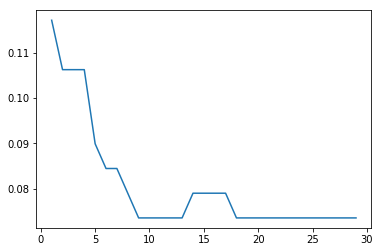

In [95]:
lmao = sns.lineplot(range(1,30), error_rate)

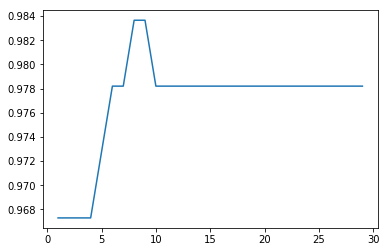

In [93]:
lol = sns.lineplot(range(1,30), accuracy)